# Quality Prediction in a Mining Process

https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process

## About Dataset

### Context
It is not always easy to find databases from real world manufacturing plants, specially mining plants. So, I would like to share this database with the community, which comes from one of the most important parts of a mining process: a flotation plant!

<b> PLEASE HELP ME GET MORE DATASETS LIKE THIS FILLING A 30s SURVEY: </b>

The main goal is to use this data to predict how much impurity is in the ore concentrate. As this impurity is measured every hour, if we can predict how much silica (impurity) is in the ore concentrate, we can help the engineers, giving them early information to take actions (empowering!). Hence, they will be able to take corrective actions in advance (reduce impurity, if it is the case) and also help the environment (reducing the amount of ore that goes to tailings as you reduce silica in the ore concentrate).

### Content
The first column shows time and date range (from march of 2017 until september of 2017). Some columns were sampled every 20 second. Others were sampled on a hourly base.

The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant. Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process. From column 9 until column 22, we can see process data (level and air flow inside the flotation columns, which also impact in ore quality. The last two columns are the final iron ore pulp quality measurement from the lab.
Target is to predict the last column, which is the % of silica in the iron ore concentrate.

### Inspiration
I have been working in this dataset for at least six months and would like to see if the community can help to answer the following questions:

Is it possible to predict % Silica Concentrate every minute?

How many steps (hours) ahead can we predict % Silica in Concentrate? This would help engineers to act in predictive and optimized way, mitigatin the % of iron that could have gone to tailings.

Is it possible to predict % Silica in Concentrate whitout using % Iron Concentrate column (as they are highly correlated)?

### Related research using this dataset
Research/Conference Papers and Master Thesis:

Purities prediction in a manufacturing froth flotation plant: the deep learning techniques link
Soft Sensor: Traditional Machine Learning or Deep Learning link
Machine Learning-based Quality Prediction in the Froth Flotation Process of Mining link

<img src="https://www.911metallurgist.com/blog/wp-content/uploads/2013/09/flotation-separators.jpg" width = 300, height = 300></img>
<br></br>
<center> https://www.911metallurgist.com/blog/wp-content/uploads/2013/09/flotation-separators.jpg </center>

## Estudo do processo

<b>Objetivo:</b></br>
Processo de flutuação de espuma utilizado para separar cobre e níquel.</br>


<b>Definições:</b></br>
Espuma líquida, dispersão coloidal com um gás disperso em uma fase contínua líquida.</br>
Separação de minerais com características mais hidrofóbicas e interação com as bolhas de ar.</br>
A flutação começou inicialmente para separar minerais de sulfeto de cobre, chumbo e zinco e atualmente é utilizado para minerais não sulfetados (óxidos, carbonatos e minerais de silicato) e também para minerais não metálicos (fluorita, talo e fosfatos).</br>

<b>Processo:</b></br>
Processo físico-químico com 3 fases: sólida, água e ar.</br>
1- Adição de pedaços de rochas que contém cobre/níquel</br>
2- Mistura de água e óleo (agente flotante)</br>
3- Introdução de bolhas de ar</br>
3.1- As bolhas de ar introduzidas no agitador colidem com as partículas minerais, que passam a deslizar ao seu redor. A parte hidrofóbica fica aderiada às bolhas e a parte hidrofílica</br>
4- O cobre flutua e as impurezas decantam</br>
5- Remoção da espuma</br>
</br>

<b>Variáveis:</b></br>
<b>Química</b></br>
1- Coletores: adsorvem (efetuam em sua superfície a adesão de moléculas insolúveis dispersas em um meio líquido ou gasoso) em superfícies minerais, aumentando a hidrofobicidade e favorecendo a fixação de bolhas.</br>
2- Reguladores: ativam ou deprimem a ligação mineral às bolhas de ar. Controlam a dispersão de partículas e o pH do sistema.</br>
3- Espumantes: tamanho da bolha (aumentar a taxa de colisão das partícuals) e manter a espuma estável</br>
<b>Físicas</b></br>
1- Tamanho do minério</br>
2- Composição das partículas</br>
3- Taxa de ar do equipamento</br>
4- Tamanho da bolha que o equipamento faz</br>

<b>Resultado:</b></br>
Minério com concentração de aproximadamente 15% de cobre</br>
As curvas de recuperação de teor" são ferramentas para avaliar a compensação de produzir um alto teor de concentrado versus custo.

https://www.youtube.com/watch?v=bAWF0B3mDXY
https://etn-sultan.eu/2021/04/06/froth-flotation-a-quick-overview/
LER
https://en.wikipedia.org/wiki/Froth_flotation
https://www.911metallurgist.com/blog/froth-flotation-process

<br></br>

In [116]:
#Bibliotecas

#Fonte dos dados
import kaggle

#Manipulação de dados
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform

#Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas.plotting import autocorrelation_plot

#Séries temporais
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit

#Modelos 
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

#Métricas de avaliação
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Otimização do modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [2]:
kaggle.api.authenticate()

In [28]:
kaggle.api.dataset_download_files('edumagalhaes/quality-prediction-in-a-mining-process', path='./data', unzip=True)

In [3]:
df = pd.read_csv("./data/MiningProcess_Flotation_Plant_Database.csv", decimal=',', index_col='date', parse_dates=True)

## Análise exploratória dos dados

In [4]:
df.shape
#print('Número de Linhas: ', df.shape[0])
#print('Número de Colunas: ', df.shape[1])

(737453, 23)

In [5]:
df.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation 

In [8]:
df.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
mean,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,281.082397,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,28.558268,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,250.855000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,298.696000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,300.382000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.644000,698.861000,659.902000,68.010000,5.530000


In [9]:
columns = df.columns
columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [10]:
#Verificando a proporção de dados duplicados
df.duplicated().value_counts()

False    736282
True       1171
dtype: int64

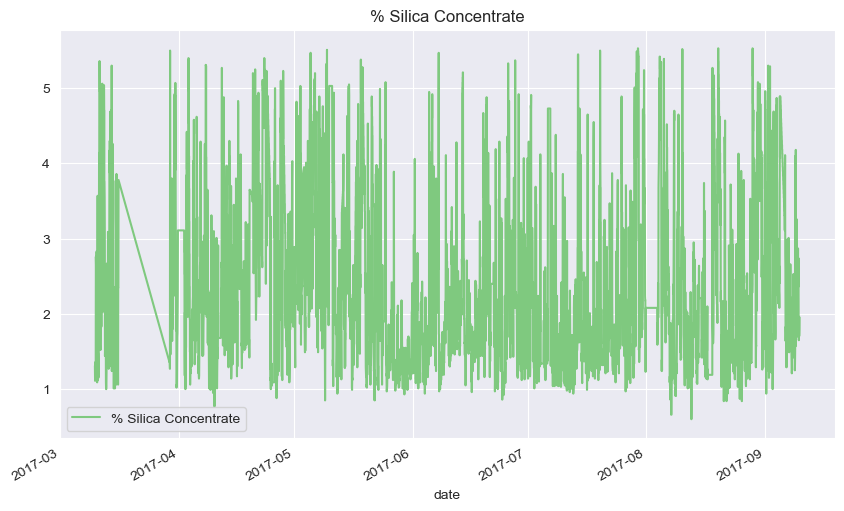

In [194]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
df['% Silica Concentrate'].plot(figsize=(10,6))
plt.title('% Silica Concentrate período completo')
plt.legend()

Existem 3 lacunas visíveis no gráfico: </br>
- Entre março e abril;
- Começo do mês de abril;
- Começo do mês de agosto.

## Avaliação do período a ser trabalhado

É informado que algumas colunas são amostradas a cada 20 segundos, mas não todas. As etapas a seguir definirão o intervalo de tempo que será trabalhado neste projeto.

In [13]:
#Começo e fim da série temporal
min_date = df.index.min()
max_date = df.index.max()

min_date, max_date

(Timestamp('2017-03-10 01:00:00'), Timestamp('2017-09-09 23:00:00'))

In [14]:
#Checando os períodos faltantes
lista_completa_horas = pd.Series(data=pd.date_range(start=min_date, end=max_date, freq='H')) #Cria uma lista com todas as horas entre o mínimo e o máximo do dataset
lista_dataset_horas = lista_completa_horas.isin(df.index.values)
lista_completa_horas[~lista_dataset_horas]

149   2017-03-16 06:00:00
150   2017-03-16 07:00:00
151   2017-03-16 08:00:00
152   2017-03-16 09:00:00
153   2017-03-16 10:00:00
              ...        
462   2017-03-29 07:00:00
463   2017-03-29 08:00:00
464   2017-03-29 09:00:00
465   2017-03-29 10:00:00
466   2017-03-29 11:00:00
Length: 318, dtype: datetime64[ns]

### Excluindo valores antes de 29/03/2017

In [15]:
df_trat = df.loc["2017-03-29 12:00:00":]

In [16]:
df_trat.shape

(710639, 23)

In [17]:
df_trat.shape[0]/df.shape[0]*100

96.36397167005897

### Avaliação da quantidade de dados por coluna
Estas análises foram retiradas de https://www.kaggle.com/code/matiasob/dataset-is-corrupted.

Entender a distribuição dos dados: quais são amostrados a cada 20 segundos e quais não.</br>
</br>
- 1 hora = 60 minutos = 3.600 segundos
- Amostragem a cada 20 segundos (3.600/20) = 180 amostragens

In [18]:
#Contagem de valores agrupados por data
df_trat.groupby(df_trat.index).count()["% Silica Concentrate"].value_counts()

180    3947
179       1
Name: % Silica Concentrate, dtype: int64

In [19]:
#Valores menores do que 180
df_trat.groupby(df_trat.index).count()["% Silica Concentrate"][df_trat.groupby(df_trat.index).count()["% Silica Concentrate"] < 180]

date
2017-04-10    179
Name: % Silica Concentrate, dtype: int64

Checando a distribuição de frequência de registros para todas as variáveis

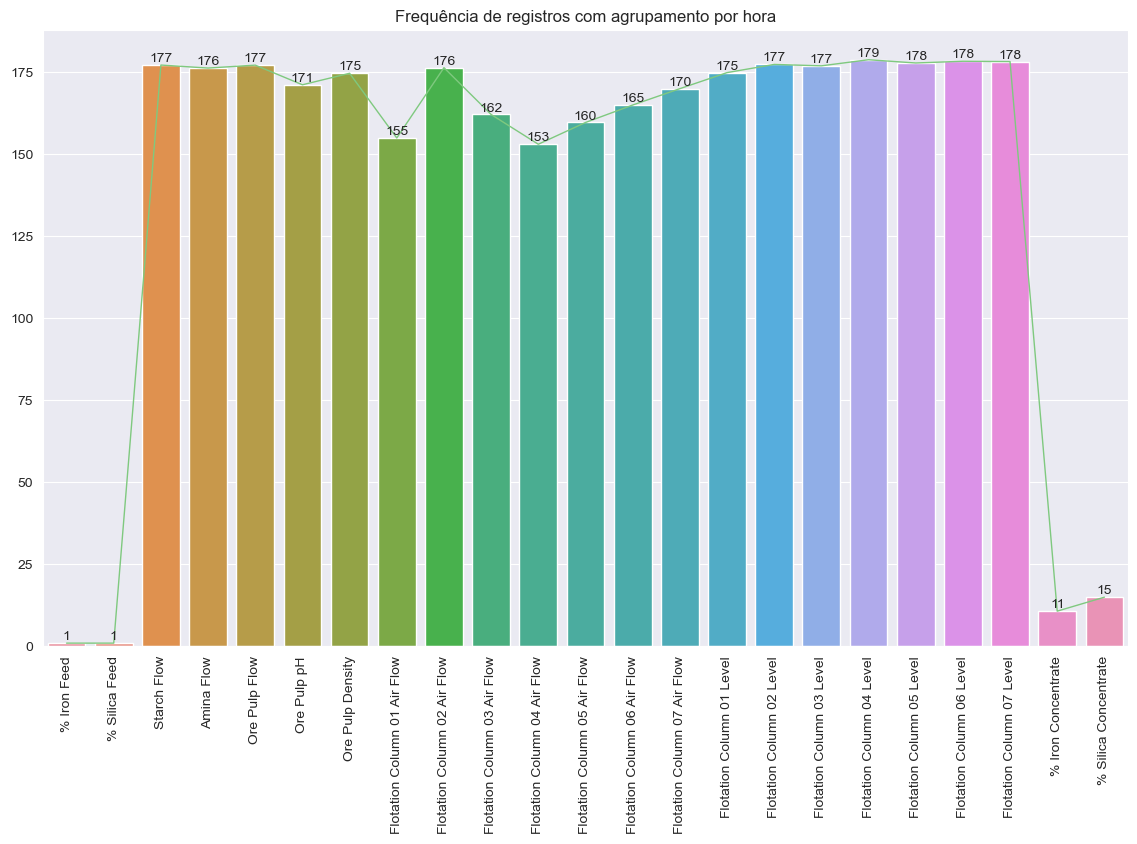

In [20]:
valores_unicos_hora = df_trat.groupby('date').nunique().mean()
plt.figure(figsize=(14,8))
sns.lineplot(x = valores_unicos_hora.index, y=valores_unicos_hora.values, lw=1)
ax = sns.barplot(x = valores_unicos_hora.index, y=valores_unicos_hora.values)
plt.xticks(rotation=90)
plt.title('Frequência de registros com agrupamento por hora')

#Rótulo de dados das colunas
for c in ax.containers:
        labels = [f"{round(h,0):.0f}" if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

Avaliando o número de registros por dia por variável

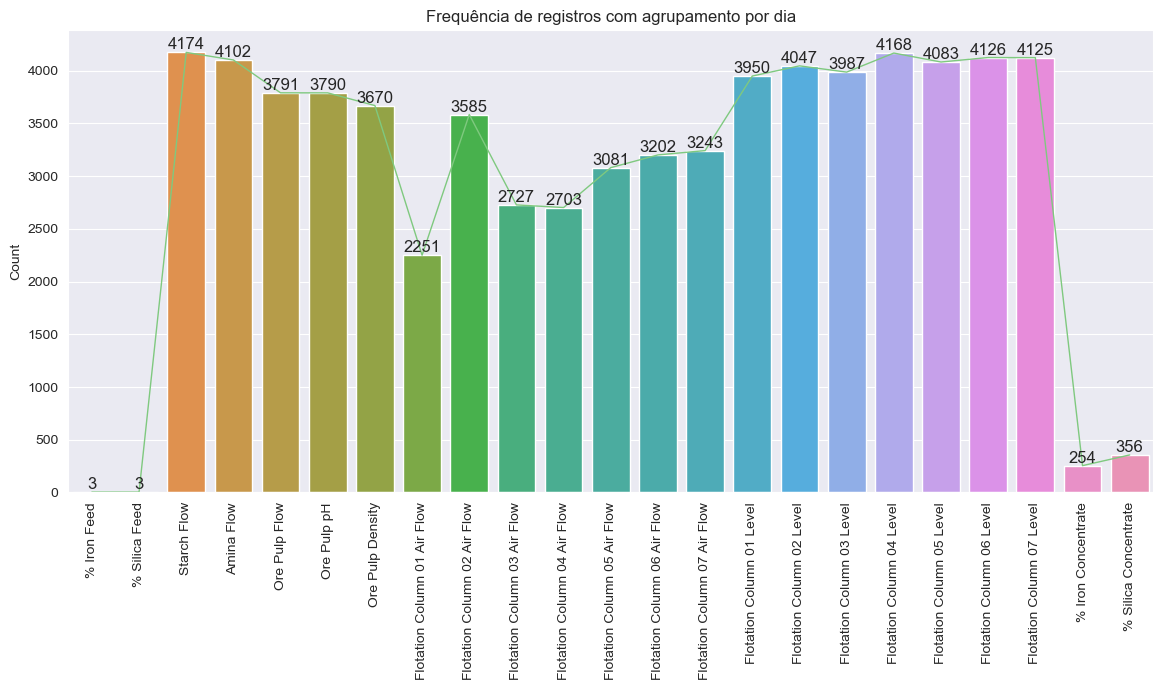

In [21]:
valores_unicos_dia = df_trat.groupby(df_trat.index.strftime('%Y-%m-%d')).nunique().mean()

plt.figure(figsize=(14,6),dpi=100)
sns.lineplot(x = valores_unicos_dia.index, y=valores_unicos_dia.values, lw=1)
ax = sns.barplot(x = valores_unicos_dia.index, y=valores_unicos_dia.values)
plt.title("Frequência de registros com agrupamento por dia")
plt.ylabel('Count')
plt.xticks(rotation=90);

for c in ax.containers:
        labels = [f"{round(h,0):.0f}" if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', **{"size":12});

Variáveis registradas a cada 20 segundos teriam 4.320 registros em um dia. 

In [22]:
freq_registro_silica_conc = df_trat.groupby(df_trat.index.strftime('%Y-%m-%d %H')).nunique()["% Silica Concentrate"]
freq_registro_silica_conc.value_counts()

1      3639
180     309
Name: % Silica Concentrate, dtype: int64

A maior parte dos registros é realizada a cada 1 hora.

Como os registros da variável target são realizados por hora e não a cada 20 segundos, os dados serão agrupados por hora para que as análises sejam realizadas neste intervalo.

### Transformando os dados para que fiquem em período de hora e não mais em segundos

In [23]:
df_hora = df_trat.resample('H').first()
df_hora.index.names = ['date']

In [24]:
df_hora.shape

(3948, 23)

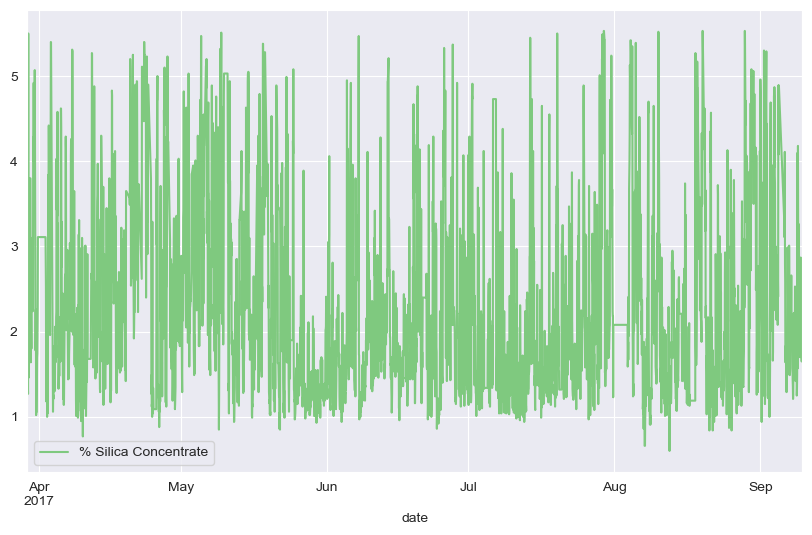

In [26]:
df_hora['% Silica Concentrate'].plot(figsize=(10,6))
plt.legend()

In [27]:
df_hora.duplicated().sum()

0

In [28]:
df_hora.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3948 entries, 2017-03-29 12:00:00 to 2017-09-09 23:00:00
Freq: H
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   % Iron Feed                   3948 non-null   float64
 1   % Silica Feed                 3948 non-null   float64
 2   Starch Flow                   3948 non-null   float64
 3   Amina Flow                    3948 non-null   float64
 4   Ore Pulp Flow                 3948 non-null   float64
 5   Ore Pulp pH                   3948 non-null   float64
 6   Ore Pulp Density              3948 non-null   float64
 7   Flotation Column 01 Air Flow  3948 non-null   float64
 8   Flotation Column 02 Air Flow  3948 non-null   float64
 9   Flotation Column 03 Air Flow  3948 non-null   float64
 10  Flotation Column 04 Air Flow  3948 non-null   float64
 11  Flotation Column 05 Air Flow  3948 non-null   float64
 12  Flotation Column 0

In [29]:
df_hora.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,...,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000
mean,56.220301,14.767789,2820.090346,488.476292,397.404409,9.769578,1.679404,281.293540,278.173193,282.271296,...,292.324604,520.172748,523.766698,531.994405,419.245377,423.673493,427.730363,418.879469,65.025622,2.323982
std,5.231150,6.887711,1232.414946,91.730712,9.783743,0.387149,0.068696,29.624629,30.196829,28.401445,...,28.172692,132.099685,128.945040,152.265513,89.217179,82.936071,89.700650,83.397581,1.113621,1.126102
min,42.740000,1.310000,0.561482,241.702368,376.291000,8.753375,1.519837,175.847339,177.560227,176.941580,...,195.026000,152.346000,211.336333,127.120281,162.717796,167.225020,159.870000,177.474268,62.050000,0.600000
25%,52.610000,8.812500,2046.280000,431.995000,394.041500,9.527458,1.646205,250.373254,250.790250,251.270250,...,290.565450,414.584500,441.703250,408.808750,356.958750,357.638250,357.728250,356.382250,64.350000,1.440000
50%,55.940000,14.200000,2956.825000,504.364000,399.180000,9.799725,1.696475,299.427000,296.690500,298.828000,...,299.198000,491.119500,496.500000,493.373000,409.408000,406.707000,419.579000,407.690000,65.195000,1.996286
75%,59.720000,20.140000,3715.035000,555.275000,402.872729,10.039825,1.726345,300.160250,300.856000,300.465000,...,302.091750,594.920750,596.440250,602.139000,484.017500,479.091750,491.042750,474.079250,65.830000,2.990000
max,65.780000,33.400000,6288.990000,739.304000,418.600000,10.807792,1.852825,372.442637,367.251000,304.541000,...,371.248000,861.600571,828.514600,886.773000,678.523491,674.076707,698.570061,656.747500,68.010000,5.530000


</br>

## Separação em treino e teste

In [30]:
# Ordenando os dados cronologicamente (caso eles não estejam ordenados)
df_hora.sort_index(inplace=True)

# Definindo a proporção de divisão entre treinamento e teste
train_ratio = 0.8

# Calculando o índice de divisão
split_index = int(train_ratio * len(df_hora))

# Dividindo os dados em conjuntos de treinamento e teste
train_data = df_hora.iloc[:split_index]
test_data = df_hora.iloc[split_index:]

In [31]:
train_data.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-29 12:00:00,60.18,9.34,2044.990000,349.911,405.625,9.74604,1.649650,200.393,195.734,201.826,...,251.002,555.264467,552.255566,614.984714,428.430,413.662,447.887,464.869,66.44,1.36
2017-03-29 13:00:00,60.18,9.34,2510.360000,306.635,402.303,9.63786,1.524512,200.165,194.286,201.929,...,250.188,851.772761,809.863864,881.307250,447.543,421.279,446.697,413.322,66.57,1.43
2017-03-29 14:00:00,60.18,9.34,2138.230000,435.199,401.953,9.61320,1.594940,199.540,197.436,198.605,...,250.488,850.510694,774.266870,886.773000,470.638,455.341,457.393,456.480,66.64,1.33
2017-03-29 15:00:00,60.18,9.34,458.079000,476.878,400.173,9.75149,1.638440,199.951,191.456,199.265,...,249.582,858.052225,778.343085,883.777182,438.033,446.859,423.184,483.157,66.41,1.27
2017-03-29 16:00:00,59.54,9.56,145.349632,252.088,399.484,9.96978,1.521080,199.072,182.430,201.251,...,250.760,853.745107,782.419299,883.715800,435.285,434.663,452.469,436.865,63.63,5.50


In [32]:
#Começo e fim da série temporal
min_date_train = train_data.index.min()
max_date_train = train_data.index.max()

min_date_train, max_date_train

(Timestamp('2017-03-29 12:00:00', freq='H'),
 Timestamp('2017-08-08 01:00:00', freq='H'))

In [34]:
#Começo e fim da série temporal
min_date_test = test_data.index.min()
max_date_test = test_data.index.max()

min_date_test, max_date_test

(Timestamp('2017-08-08 02:00:00', freq='H'),
 Timestamp('2017-09-09 23:00:00', freq='H'))

## Análise das variáveis individualmente

In [35]:
# Distribuição de frequência das variáveis'
def criar_grafico_freq(df_graf, coluna):
    
    '''
    Gera histogramas
    
    arg:
    - df_graf: conjunto de dados;
    - coluna: coluna que será usada para o gráfico
    '''
    
    plt.figure(figsize=(4,4)) 
    plt.hist(df_graf[coluna], label=coluna)
    plt.axvline(df_graf[coluna].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')
    plt.axvline(df_graf[coluna].median(), color='black', linewidth=2, label='Mediana')
    plt.legend()
    plt.show()

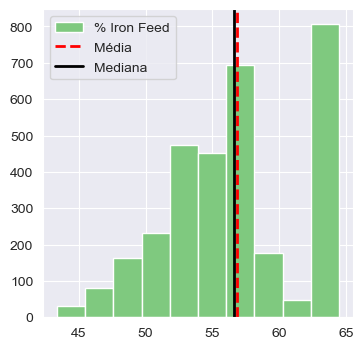

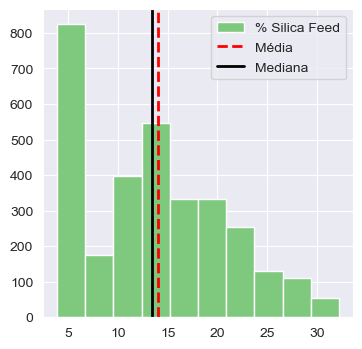

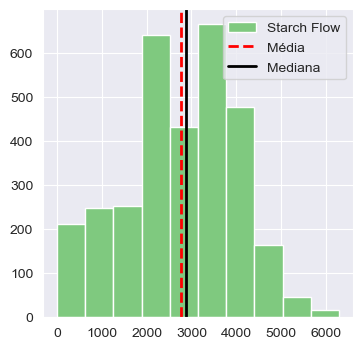

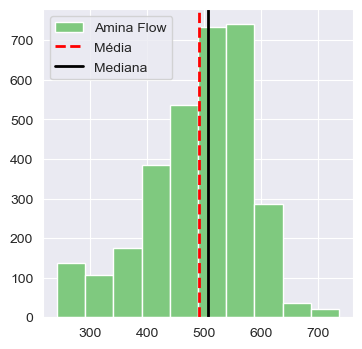

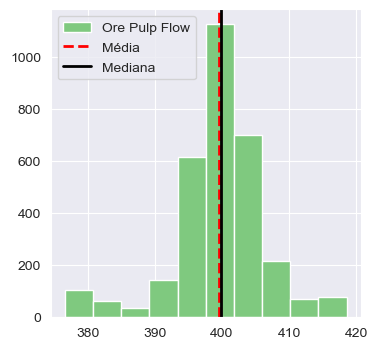

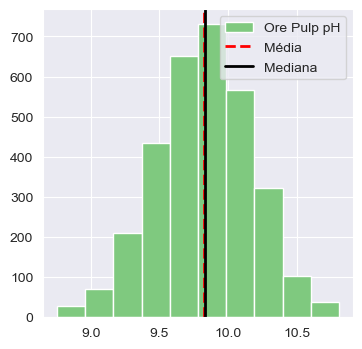

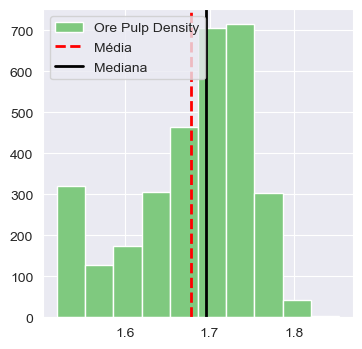

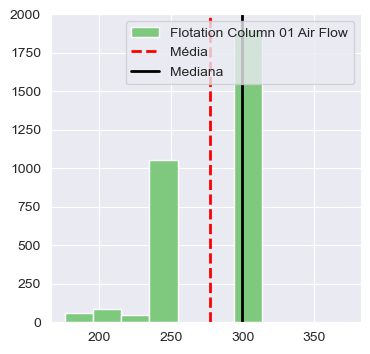

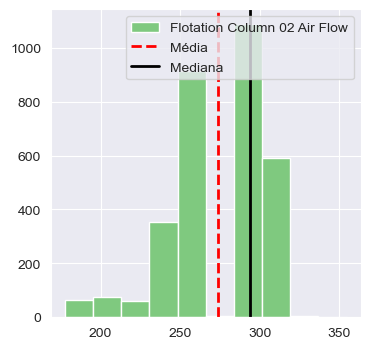

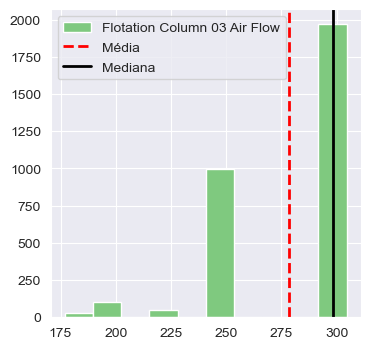

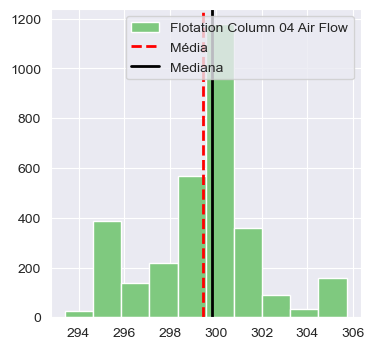

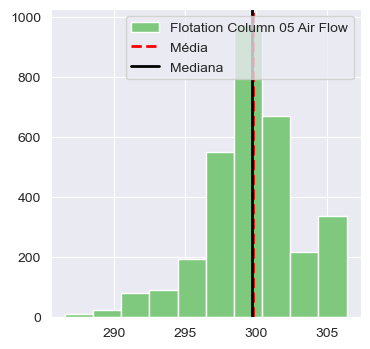

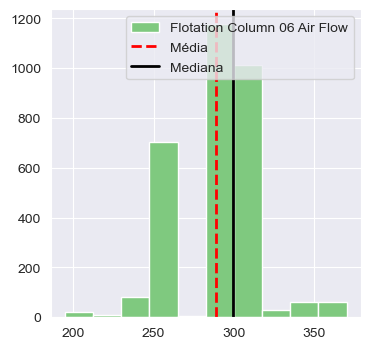

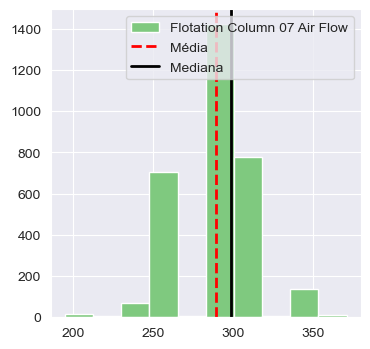

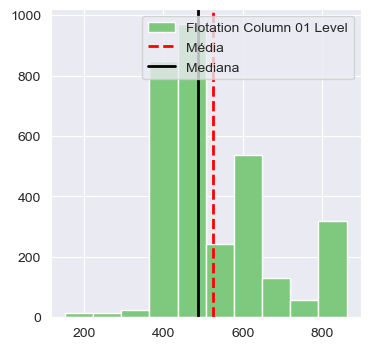

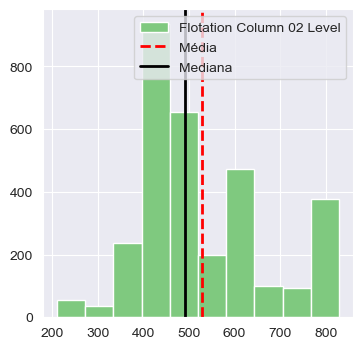

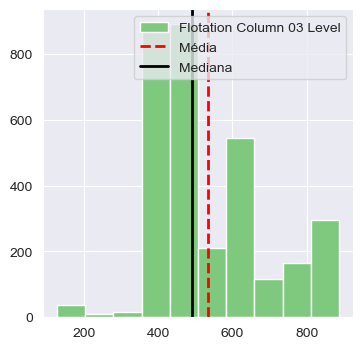

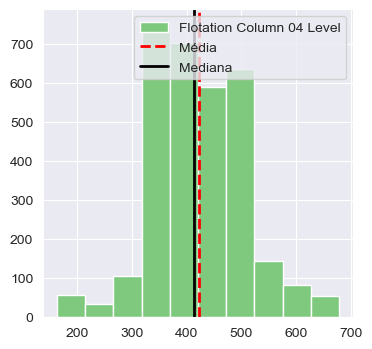

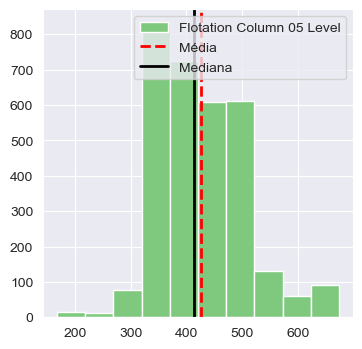

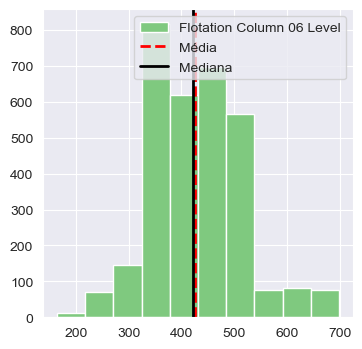

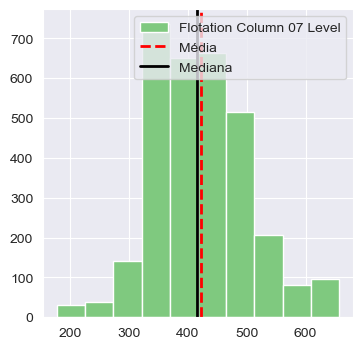

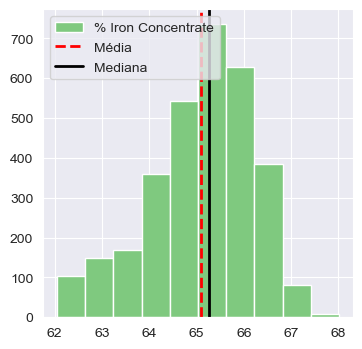

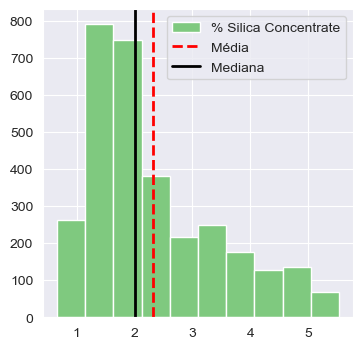

In [36]:
for column in columns:
    criar_grafico_freq(train_data, column)

## Análise de outliers por variável

In [37]:
# Distribuição de frequência das variáveis'
def criar_grafico_outlier(df_graf, coluna):
    
    '''
    Gera os gráficos box plot
    
    arg:
    - df_graf: conjunto de dados;
    - coluna: coluna que será usada para o gráfico
    
    '''

    df_graf[coluna].plot(kind='box')
    plt.show()

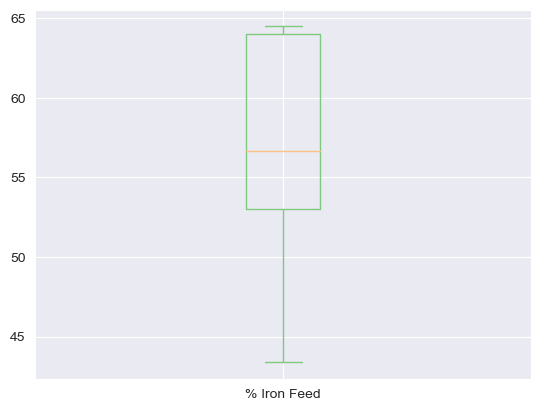

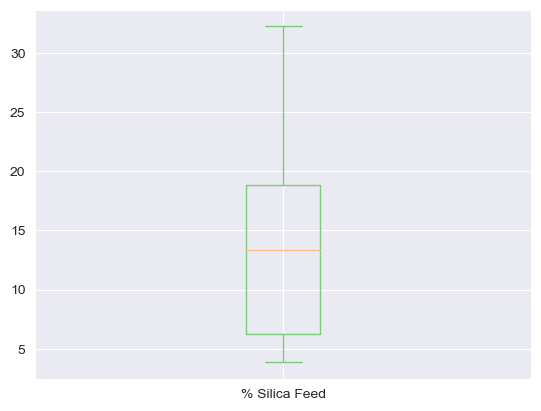

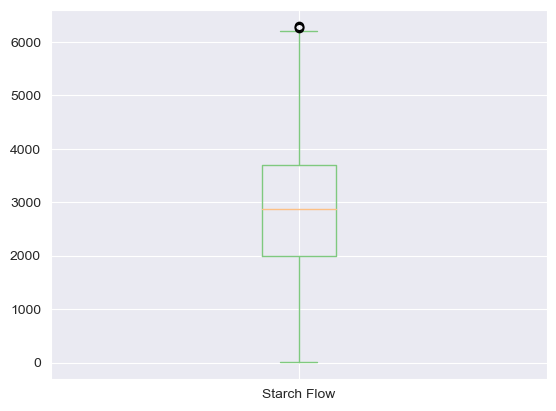

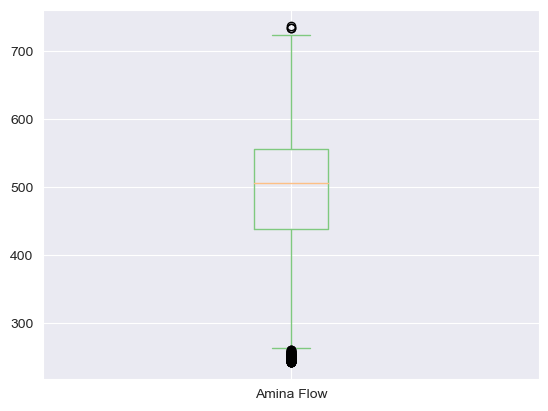

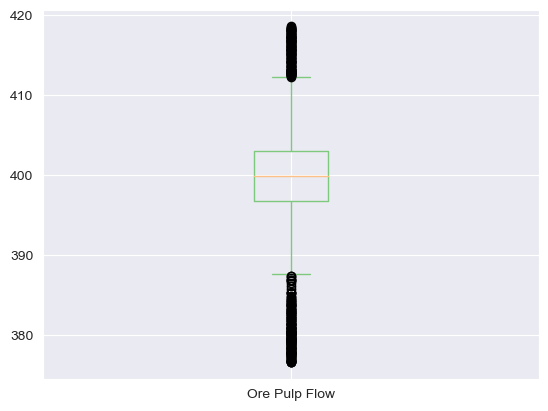

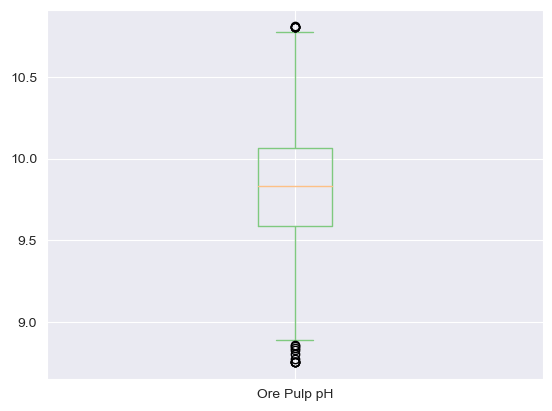

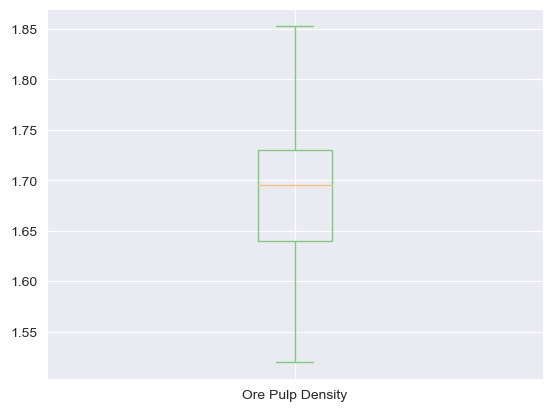

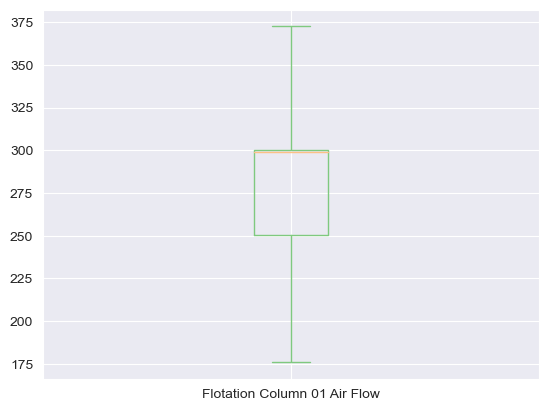

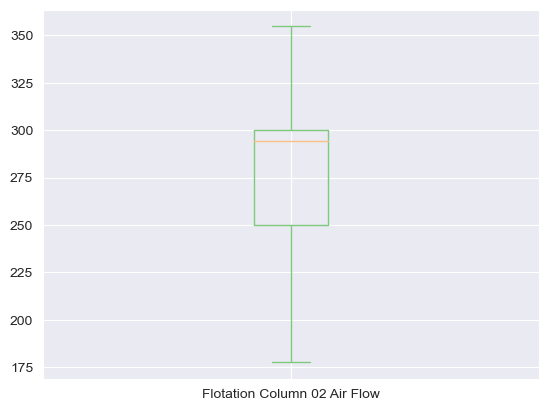

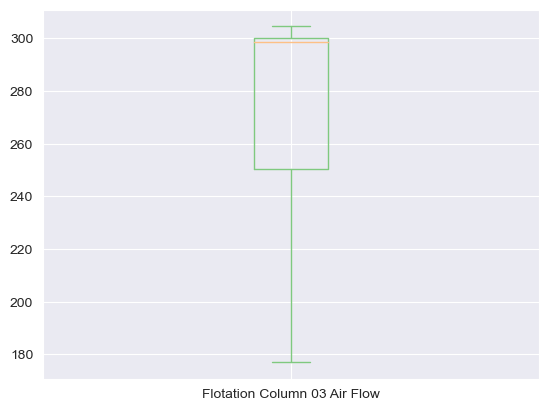

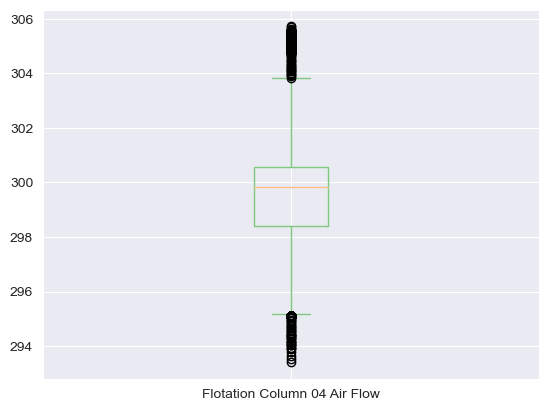

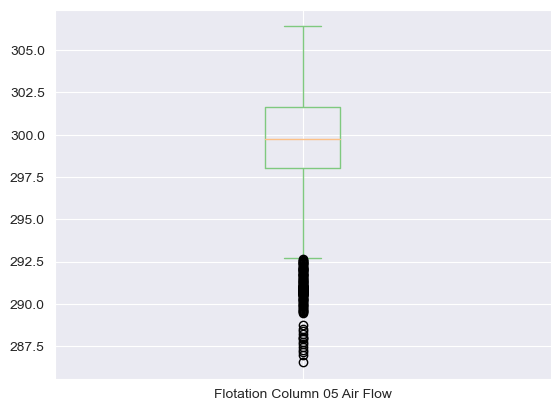

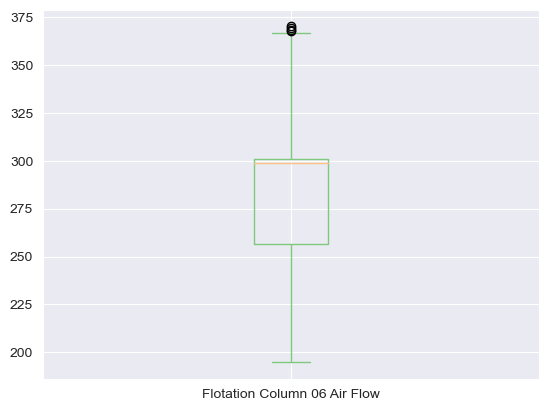

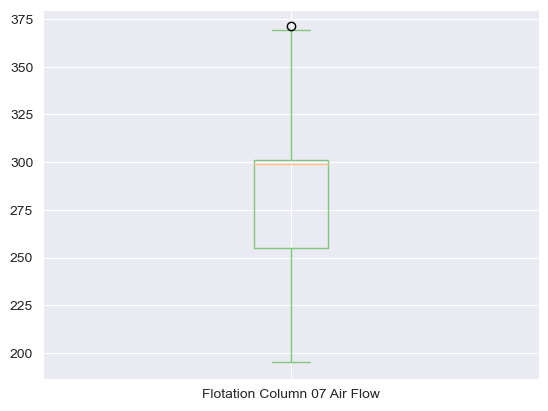

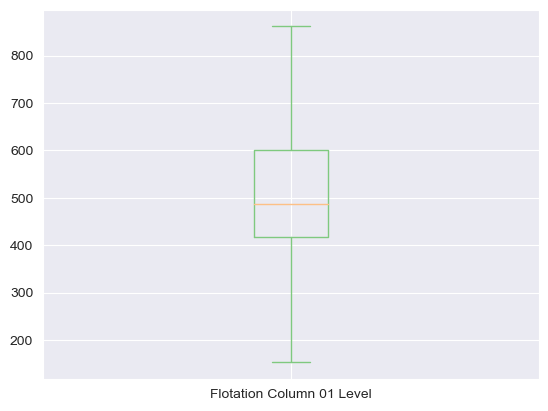

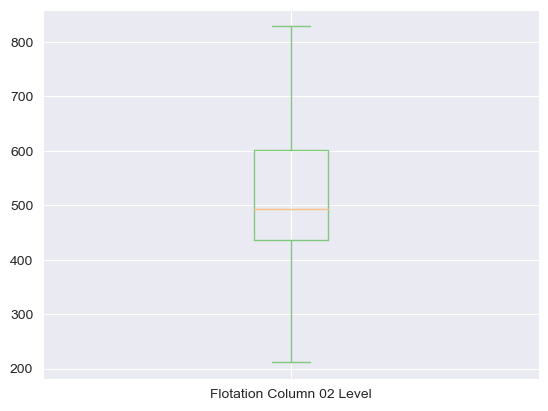

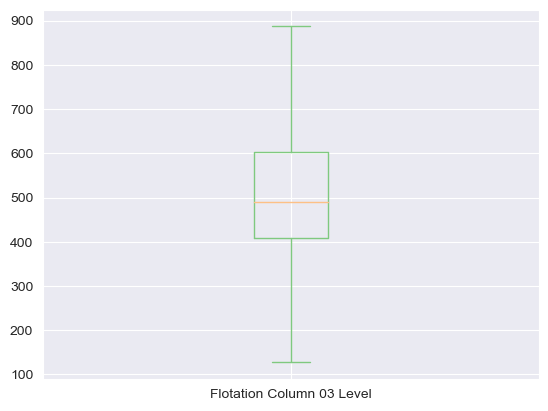

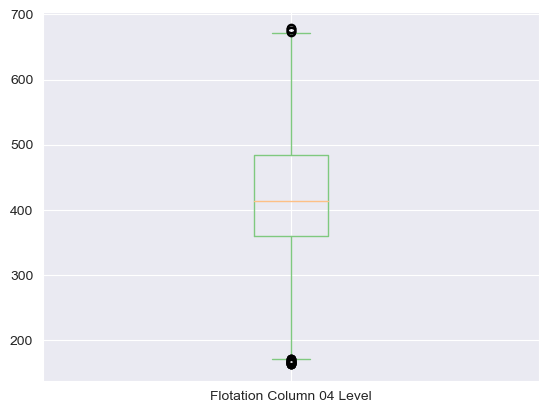

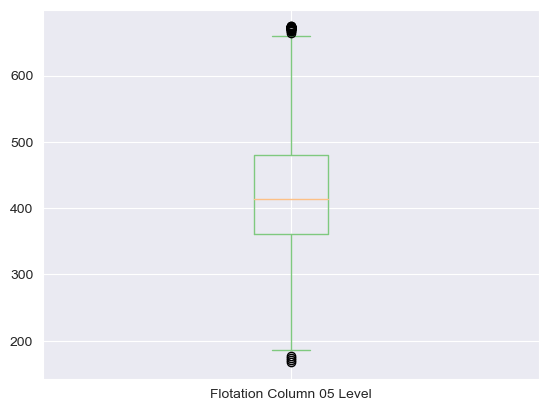

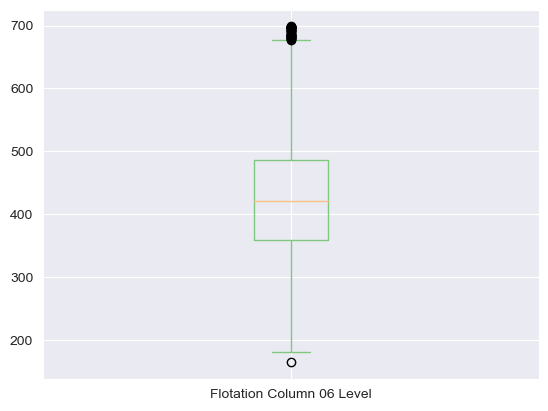

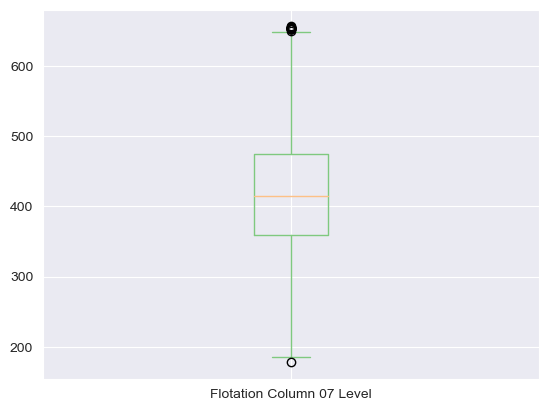

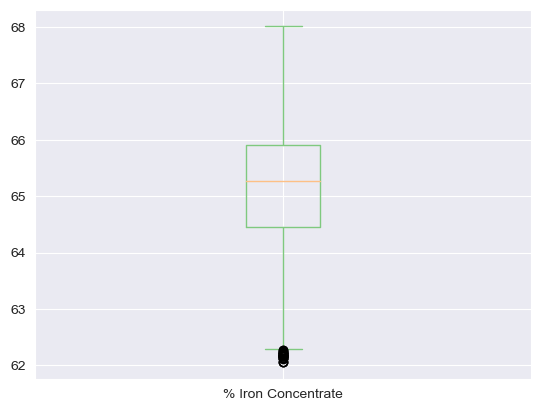

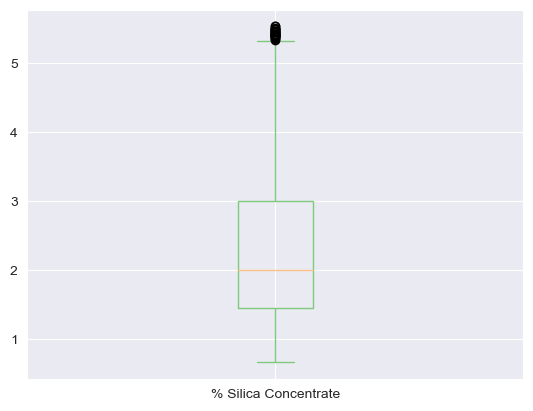

In [38]:
for column in columns:
    criar_grafico_outlier(train_data, column)

### Análise de outlier para a concentração de Sílica/ferro

In [39]:
Q1_silica = train_data['% Silica Concentrate'].quantile(0.25) 
Q3_silica = train_data['% Silica Concentrate'].quantile(0.75) 
IQR_silica=Q3_silica-Q1_silica
df_out_silica = train_data.loc[(train_data['% Silica Concentrate'] <= (Q1_silica - 1.5 * IQR_silica)) | (train_data['% Silica Concentrate'] >= (Q3_silica + 1.5 * IQR_silica))]
df_out_silica['% Silica Concentrate'].value_counts().sum()

28

In [40]:
Q1_ferro = train_data['% Iron Concentrate'].quantile(0.25) 
Q3_ferro = train_data['% Iron Concentrate'].quantile(0.75) 
IQR_ferro=Q3_ferro-Q1_ferro
df_out_ferro = train_data.loc[(train_data['% Iron Concentrate'] <= (Q1_ferro - 1.5 * IQR_ferro)) | (train_data['% Iron Concentrate'] >= (Q3_ferro + 1.5 * IQR_ferro))]
df_out_ferro['% Iron Concentrate'].value_counts().sum()

28

In [41]:
df_out_silica['% Silica Concentrate']

date
2017-03-29 16:00:00    5.500000
2017-04-03 11:00:00    5.400000
2017-04-03 12:00:00    5.397590
2017-04-23 06:00:00    5.400000
2017-04-23 07:00:00    5.399171
2017-05-05 08:00:00    5.470000
2017-05-05 09:00:00    5.470000
2017-05-09 15:00:00    5.510000
2017-05-18 11:00:00    5.380000
2017-05-18 12:00:00    5.377514
2017-06-07 19:00:00    5.470000
2017-06-25 22:00:00    5.330000
2017-06-27 18:00:00    5.370000
2017-07-14 04:00:00    5.450000
2017-07-14 05:00:00    5.444159
2017-07-19 22:00:00    5.500000
2017-07-29 12:00:00    5.490000
2017-07-29 19:00:00    5.530000
2017-07-29 20:00:00    5.529797
2017-07-29 21:00:00    5.493198
2017-07-29 22:00:00    5.456599
2017-07-29 23:00:00    5.420000
2017-07-30 00:00:00    5.420000
2017-08-04 11:00:00    5.420000
2017-08-04 12:00:00    5.420000
2017-08-04 13:00:00    5.419098
2017-08-04 20:00:00    5.350000
2017-08-05 14:00:00    5.390000
Name: % Silica Concentrate, dtype: float64

In [42]:
train_data.isnull().sum().sort_values(ascending=False)

% Iron Feed                     0
Flotation Column 06 Air Flow    0
% Iron Concentrate              0
Flotation Column 07 Level       0
Flotation Column 06 Level       0
Flotation Column 05 Level       0
Flotation Column 04 Level       0
Flotation Column 03 Level       0
Flotation Column 02 Level       0
Flotation Column 01 Level       0
Flotation Column 07 Air Flow    0
Flotation Column 05 Air Flow    0
% Silica Feed                   0
Flotation Column 04 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 01 Air Flow    0
Ore Pulp Density                0
Ore Pulp pH                     0
Ore Pulp Flow                   0
Amina Flow                      0
Starch Flow                     0
% Silica Concentrate            0
dtype: int64

### Decomposição da série temporal

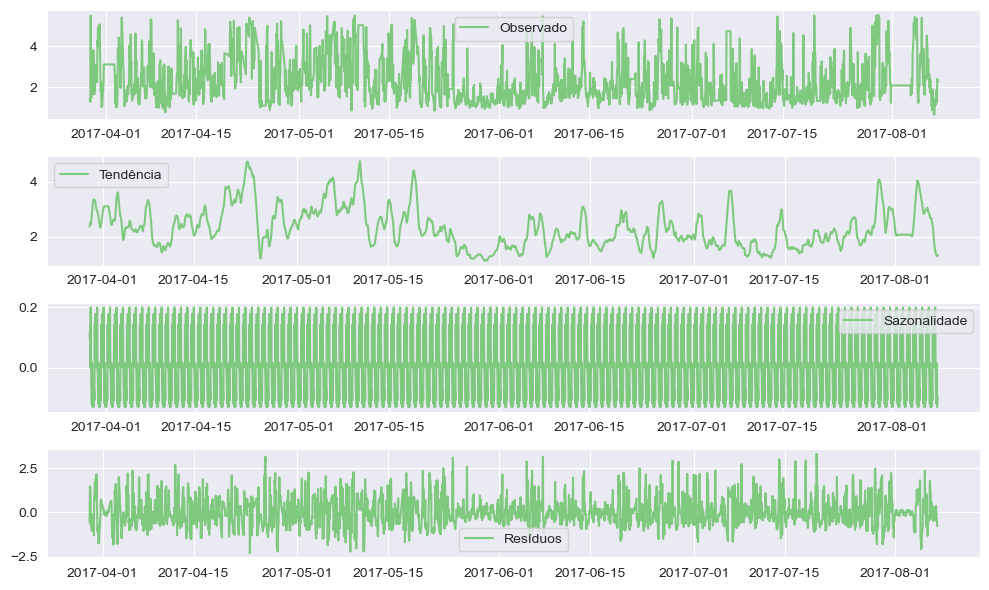

In [50]:
decompose = seasonal_decompose(train_data["% Silica Concentrate"], model='additive')
#decompose.plot()

plt.figure(figsize=(10, 6))

# Plot dos componentes
plt.subplot(4, 1, 1)
plt.plot(decompose.observed, label='Observado')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decompose.trend, label='Tendência')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decompose.seasonal, label='Sazonalidade')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decompose.resid, label='Resíduos')
plt.legend()

plt.tight_layout()
plt.show()

## Teste de estacionariedade

Não é estacionário se tiver tendência ou sazonalidade.
- Tendência: topos e fundos vão aumentando ou diminuindo com o tempo;
- Sazonalidade: valores cíclicos.

In [52]:
# Selecionando a coluna de interesse para o teste de estacionariedade
series = train_data['% Silica Concentrate']

# Realizando o teste de Dickey-Fuller Aumentado
result = adfuller(series)

# Extraindo os resultados do teste
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'P-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')
    
if p_value <= 0.05:
    print("Resultado: A série é estacionária")
else:
    print("Resultado: A série não é estacionária")

ADF Statistic: -6.950634889671449
P-value: 9.71338390957294e-10
Critical Values:
   1%: -3.4324389453866817
   5%: -2.8624629669644266
   10%: -2.5672613171352516
Resultado: A série é estacionária


## Aplicação dos modelos

## Criação da variável target e lagged (1 hora) para que o modelo entenda a relação temporal

In [150]:
def criar_col_lagged (df_lagged, coluna, lag):
    
    '''
    Função para incluir uma coluna com os valores anteriores para indicar a relação temporal ao algoritmo
    
    arg:
    - df_lagged: conjunto de dados
    - coluna: coluna resposta que será utilizada como referência
    - lag: intervalo de avaliação
    
    return:
    - df_return: conjunto de dados acrescido da coluna com dados do dia seguinte à cada linha
    '''
    
    df_return = df_lagged.copy()
    df_return['target'] = df_lagged[coluna].shift(lag)
    df_return = df_return.dropna()
    
    
    return df_return

In [151]:
train_data_lagged = train_data.copy()
train_data_lagged = criar_col_lagged(train_data_lagged, '% Silica Concentrate', -1)
train_data_lagged.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,target
date,,,,,,,,,,,,,,,,,,,,,
2017-03-29 12:00:00,60.18,9.34,2044.990000,349.911,405.625,9.74604,1.649650,200.393,195.734,201.826,...,555.264467,552.255566,614.984714,428.430,413.662,447.887,464.869,66.44,1.36,1.43
2017-03-29 13:00:00,60.18,9.34,2510.360000,306.635,402.303,9.63786,1.524512,200.165,194.286,201.929,...,851.772761,809.863864,881.307250,447.543,421.279,446.697,413.322,66.57,1.43,1.33
2017-03-29 14:00:00,60.18,9.34,2138.230000,435.199,401.953,9.61320,1.594940,199.540,197.436,198.605,...,850.510694,774.266870,886.773000,470.638,455.341,457.393,456.480,66.64,1.33,1.27
2017-03-29 15:00:00,60.18,9.34,458.079000,476.878,400.173,9.75149,1.638440,199.951,191.456,199.265,...,858.052225,778.343085,883.777182,438.033,446.859,423.184,483.157,66.41,1.27,5.50
2017-03-29 16:00:00,59.54,9.56,145.349632,252.088,399.484,9.96978,1.521080,199.072,182.430,201.251,...,853.745107,782.419299,883.715800,435.285,434.663,452.469,436.865,63.63,5.50,1.64


In [77]:
test_data_lagged = test_data.copy()
test_data_lagged = criar_col_lagged(test_data_lagged, '% Silica Concentrate', -1)
test_data_lagged.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,target
date,,,,,,,,,,,,,,,,,,,,,
2017-08-08 02:00:00,48.81,25.31,4235.06,644.127,406.695966,9.87277,1.70218,300.634,303.645,299.219,...,489.236,502.219,490.452,529.135,502.149,497.070,502.487,64.77,2.42,2.83
2017-08-08 03:00:00,48.81,25.31,3545.90,645.758,415.137345,9.81877,1.72850,297.958,295.184,296.474,...,516.995,508.061,517.424,531.532,492.539,526.389,506.195,63.83,2.83,4.04
2017-08-08 04:00:00,48.81,25.31,4429.32,660.118,417.510459,9.90166,1.74272,299.825,296.226,302.361,...,520.354,518.871,482.109,463.522,450.288,512.454,527.905,63.58,4.04,4.66
2017-08-08 05:00:00,48.81,25.31,3107.97,633.373,410.255000,9.57768,1.75059,299.037,293.423,299.697,...,507.257,493.526,524.877,497.754,519.098,531.837,492.917,63.33,4.66,4.57
2017-08-08 06:00:00,48.81,25.31,2796.88,581.064,403.258000,9.70286,1.69515,299.954,299.225,299.241,...,486.579,477.570,492.525,513.794,457.882,498.089,496.514,62.19,4.57,4.70


## Separação da coluna resposta

In [60]:
def separacao_treino_teste (df_train, df_test, columns_X, column_y):
    
    '''
    Função para separar o conjunto de dados em treino e teste de acordo com as colunas que são escolhidas 
    para permanecer no modelo
    
    args:
    - df_train: bloco de dados que será utilizado previamente separado para treino;
    - df_test: bloco de dados que será utilizado previamente separado para teste;
    - columns_X: colunas que serão excluídas no modelo que será treinado;
    - column_y: coluna resposta.
    
    return:
    - X_train: bloco de dados com as colunas para treino;
    - y_train: bloco de dados com a coluna resposta do treino;
    - X_test: bloco de dados com as colunas para teste;
    - y_test: bloco de dados com a coluna resposta do teste.
    '''
    
    X_train = df_train.drop(columns = columns_X)
    y_train = df_train[column_y]
    X_test = df_test.drop(columns = columns_X)
    y_test = df_test[column_y]
    
    return X_train, y_train, X_test, y_test

#### Separando os conjuntos de dados de treino e teste

In [78]:
X_train, y_train, X_test, y_test = separacao_treino_teste(train_data_lagged, 
                                                          test_data_lagged, 
                                                          ['target'], 
                                                          ['target'])

In [79]:
X_train.shape, y_train.shape

((3157, 23), (3157, 1))

In [80]:
X_test.shape, y_test.shape

((789, 23), (789, 1))

### Modelo baseline

In [81]:
# Criando o modelo Random Forest
random_forest_model = RandomForestRegressor(random_state=42)

In [82]:
# Treinando o modelo
random_forest_model.fit(X_train, y_train)

C:\Users\Maeba\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [83]:
# Fazendo previsões nos dados de teste
y_pred = random_forest_model.predict(X_test)

In [109]:
def avaliacao_modelo_regressao (y_test_metric, y_pred_metric):
    
    '''
    Calcula e retorna as métricas de avaliação para um modelo de regressão
    
    args:
    - y_test_metric: valores reais (teste)
    - y_pred_metric: valores previstos pelo modelo
    
    Retorna um dicionário com as métricas calculadas
    '''
    
    metrics = {}
    
    metrics['Mean Squared Error'] = mean_squared_error(y_test_metric, y_pred_metric)
    metrics['Mean Absolute Error'] = mean_absolute_error(y_test_metric, y_pred_metric)
    metrics['Root Mean Squared Error'] = np.sqrt(metrics['Mean Squared Error'])
    metrics['R-squared (R²)'] = r2_score(y_test_metric, y_pred_metric)
    
    return metrics

In [110]:
metricas_random_forest = avaliacao_modelo_regressao(y_test, y_pred)
for metric, value in metricas_random_forest.items():
    print(f'{metric}: {value}')

Mean Squared Error: 0.5703140551320667
Mean Absolute Error: 0.5703629672449506
Root Mean Squared Error: 0.7551914029781236
R-squared (R²): 0.5761763472732222


### Seleção de features

In [90]:
# Obtendo a importância das features
feature_importances = random_forest_model.feature_importances_
# Criando um DataFrame para visualizar a importância das features
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Ordenando as features por importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                         Feature  Importance
22          % Silica Concentrate    0.626636
21            % Iron Concentrate    0.027997
2                    Starch Flow    0.024248
5                    Ore Pulp pH    0.021142
6               Ore Pulp Density    0.019724
15     Flotation Column 02 Level    0.019352
18     Flotation Column 05 Level    0.018993
3                     Amina Flow    0.018462
7   Flotation Column 01 Air Flow    0.018114
9   Flotation Column 03 Air Flow    0.018113
19     Flotation Column 06 Level    0.017357
4                  Ore Pulp Flow    0.017355
8   Flotation Column 02 Air Flow    0.016256
16     Flotation Column 03 Level    0.016064
11  Flotation Column 05 Air Flow    0.014781
12  Flotation Column 06 Air Flow    0.014759
14     Flotation Column 01 Level    0.014615
10  Flotation Column 04 Air Flow    0.014534
13  Flotation Column 07 Air Flow    0.014437
17     Flotation Column 04 Level    0.014248
20     Flotation Column 07 Level    0.011753
1         

In [108]:
train_data.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

#### Teste com as variáveis que tem influência e exclusão das que são diretamente relacionadas

In [102]:
#Seleção das variáveis
importance_df[2:5]

,Feature,Importance
2,Starch Flow,0.024248
5,Ore Pulp pH,0.021142
6,Ore Pulp Density,0.019724


In [100]:
df.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [111]:
X_train_2, y_train_2, X_test_2, y_test_2 = separacao_treino_teste(train_data_lagged, 
                                                                  test_data_lagged, 
                                                                  ['% Iron Feed', 
                                                                   '% Silica Feed', 
                                                                   'Amina Flow', 
                                                                   'Ore Pulp Flow', 
                                                                   'Flotation Column 01 Air Flow', 
                                                                   'Flotation Column 02 Air Flow',
                                                                   'Flotation Column 03 Air Flow', 
                                                                   'Flotation Column 04 Air Flow',
                                                                   'Flotation Column 05 Air Flow', 
                                                                   'Flotation Column 06 Air Flow',
                                                                   'Flotation Column 07 Air Flow', 
                                                                   'Flotation Column 01 Level',
                                                                   'Flotation Column 02 Level', 
                                                                   'Flotation Column 03 Level',
                                                                   'Flotation Column 04 Level', 
                                                                   'Flotation Column 05 Level',
                                                                   'Flotation Column 06 Level', 
                                                                   'Flotation Column 07 Level',
                                                                   '% Iron Concentrate', 
                                                                   '% Silica Concentrate'], 
                                                                  ['target'])

In [112]:
X_train_2.shape, y_train_2.shape

((3157, 4), (3157, 1))

### Testando novo modelo

In [113]:
# Criando o modelo Random Forest
random_forest_model2 = RandomForestRegressor(random_state=42)
# Treinando o modelo
random_forest_model2.fit(X_train_2, y_train_2)
# Fazendo previsões nos dados de teste
y_pred_2 = random_forest_model2.predict(X_test_2)

C:\Users\Maeba\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [121]:
metricas_random_forest2 = avaliacao_modelo_regressao(y_test_2, y_pred_2)
for metric, value in metricas_random_forest2.items():
    print(f'{metric}: {value}')

Mean Squared Error: 2.097601706683681e-05
Mean Absolute Error: 0.0009949490139134097
Root Mean Squared Error: 0.004579958194878727
R-squared (R²): 0.9999844118655451


#### Ajustando os hiperparâmetros para evitar o overffiting

In [122]:
# Possíveis para o hiperparâmetro max_depth
param_grid = {'max_depth': [None, 5, 10, 15, 20]}

# Criando o modelo Random Forest
random_forest_model3 = RandomForestRegressor(random_state=42)

# Criando uma grade de teste dos hiperparâmetros
grid_search = GridSearchCV(random_forest_model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Realizando a busca na grade
grid_search.fit(X_train_2, y_train_2)

# Melhor modelo encontrado
best_random_forest_model = grid_search.best_estimator_

# Fazendo previsões nos dados de teste
y_pred_3 = best_random_forest_model.predict(X_test_2)

# Calculando o erro médio quadrado
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Melhor valor para max_depth: {best_random_forest_model.max_depth}')

C:\Users\Maeba\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Maeba\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Maeba\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Maeba\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Mean Squared Error: 0.5703140551320667
Melhor valor para max_depth: 15


In [136]:
# Usando os parâmetros escolhidos para criar o modelo
random_forest_model4 = RandomForestRegressor(max_depth=15, random_state=42)

# Treinando o modelo final com os dados de treinamento
random_forest_model4.fit(X_train_2, y_train_2)

# Fazendo previsões nos dados de teste
y_pred_4 = random_forest_model4.predict(X_test_2)

C:\Users\Maeba\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [137]:
metricas_random_forest3 = avaliacao_modelo_regressao(y_test_2, y_pred_4)
for metric, value in metricas_random_forest3.items():
    print(f'{metric}: {value}')

Mean Squared Error: 2.1031950995801285e-05
Mean Absolute Error: 0.000997077781725798
Root Mean Squared Error: 0.004586060509391616
R-squared (R²): 0.9999843702987594


### Diminuindo ainda mais a profundidade

In [138]:
# Usando os parâmetros escolhidos para criar o modelo
random_forest_model5 = RandomForestRegressor(max_depth=3, random_state=42)

# Treinando o modelo final com os dados de treinamento
random_forest_model5.fit(X_train_2, y_train_2)

# Fazendo previsões nos dados de teste
y_pred_5 = random_forest_model5.predict(X_test_2)

C:\Users\Maeba\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [139]:
metricas_random_forest4 = avaliacao_modelo_regressao(y_test_2, y_pred_5)
for metric, value in metricas_random_forest4.items():
    print(f'{metric}: {value}')

Mean Squared Error: 0.020643113291924347
Mean Absolute Error: 0.1184881057482163
Root Mean Squared Error: 0.14367711471185782
R-squared (R²): 0.9846592599282686


## Testando Xgboost com todos os parâmetros

In [125]:
modelo_xgb = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [127]:
# Fazendo previsões nos dados de teste
y_pred_5 = modelo_xgb.predict(X_test)

In [128]:
metricas_xgb = avaliacao_modelo_regressao(y_test, y_pred_5)
for metric, value in metricas_xgb.items():
    print(f'{metric}: {value}')

Mean Squared Error: 0.6767840384707959
Mean Absolute Error: 0.6068500511817492
Root Mean Squared Error: 0.8226688510395881
R-squared (R²): 0.4970541568970268


## Aumentando o intervalo (lag) para previsão de 10 horas

In [188]:
train_data_lagged10 = train_data.copy()
train_data_lagged10 = criar_col_lagged(train_data_lagged10, '% Silica Concentrate', -10)
train_data_lagged10.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,target
date,,,,,,,,,,,,,,,,,,,,,
2017-03-29 12:00:00,60.18,9.34,2044.990000,349.911,405.625,9.74604,1.649650,200.393,195.734,201.826,...,555.264467,552.255566,614.984714,428.430,413.662,447.887,464.869,66.44,1.36,2.92
2017-03-29 13:00:00,60.18,9.34,2510.360000,306.635,402.303,9.63786,1.524512,200.165,194.286,201.929,...,851.772761,809.863864,881.307250,447.543,421.279,446.697,413.322,66.57,1.43,2.00
2017-03-29 14:00:00,60.18,9.34,2138.230000,435.199,401.953,9.61320,1.594940,199.540,197.436,198.605,...,850.510694,774.266870,886.773000,470.638,455.341,457.393,456.480,66.64,1.33,1.69
2017-03-29 15:00:00,60.18,9.34,458.079000,476.878,400.173,9.75149,1.638440,199.951,191.456,199.265,...,858.052225,778.343085,883.777182,438.033,446.859,423.184,483.157,66.41,1.27,3.80
2017-03-29 16:00:00,59.54,9.56,145.349632,252.088,399.484,9.96978,1.521080,199.072,182.430,201.251,...,853.745107,782.419299,883.715800,435.285,434.663,452.469,436.865,63.63,5.50,3.80


In [189]:
test_data_lagged10 = test_data.copy()
test_data_lagged10 = criar_col_lagged(test_data_lagged10, '% Silica Concentrate', -10)
test_data_lagged10.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,target
date,,,,,,,,,,,,,,,,,,,,,
2017-08-08 02:00:00,48.81,25.31,4235.06,644.127,406.695966,9.87277,1.70218,300.634,303.645,299.219,...,489.236,502.219,490.452,529.135,502.149,497.070,502.487,64.77,2.42,1.18
2017-08-08 03:00:00,48.81,25.31,3545.90,645.758,415.137345,9.81877,1.72850,297.958,295.184,296.474,...,516.995,508.061,517.424,531.532,492.539,526.389,506.195,63.83,2.83,1.06
2017-08-08 04:00:00,48.81,25.31,4429.32,660.118,417.510459,9.90166,1.74272,299.825,296.226,302.361,...,520.354,518.871,482.109,463.522,450.288,512.454,527.905,63.58,4.04,0.91
2017-08-08 05:00:00,48.81,25.31,3107.97,633.373,410.255000,9.57768,1.75059,299.037,293.423,299.697,...,507.257,493.526,524.877,497.754,519.098,531.837,492.917,63.33,4.66,1.02
2017-08-08 06:00:00,48.81,25.31,2796.88,581.064,403.258000,9.70286,1.69515,299.954,299.225,299.241,...,486.579,477.570,492.525,513.794,457.882,498.089,496.514,62.19,4.57,1.02


### Separação em treino e teste

In [190]:
X_train_lag10, y_train_lag10, X_test_lag10, y_test_lag10 = separacao_treino_teste(train_data_lagged10, 
                                                          test_data_lagged10, 
                                                                  ['% Iron Feed', 
                                                                   '% Silica Feed', 
                                                                   'Amina Flow', 
                                                                   'Ore Pulp Flow', 
                                                                   'Flotation Column 01 Air Flow', 
                                                                   'Flotation Column 02 Air Flow',
                                                                   'Flotation Column 03 Air Flow', 
                                                                   'Flotation Column 04 Air Flow',
                                                                   'Flotation Column 05 Air Flow', 
                                                                   'Flotation Column 06 Air Flow',
                                                                   'Flotation Column 07 Air Flow', 
                                                                   'Flotation Column 01 Level',
                                                                   'Flotation Column 02 Level', 
                                                                   'Flotation Column 03 Level',
                                                                   'Flotation Column 04 Level', 
                                                                   'Flotation Column 05 Level',
                                                                   'Flotation Column 06 Level', 
                                                                   'Flotation Column 07 Level',
                                                                   '% Iron Concentrate', 
                                                                   '% Silica Concentrate'], 
                                                                  ['target'])

In [191]:
# Criando o modelo Random Forest
random_forest_model_lag10 = RandomForestRegressor(max_depth=3, random_state=42)
# Treinando o modelo
random_forest_model_lag10.fit(X_train_lag10, y_train_lag10)
# Fazendo previsões nos dados de teste
y_pred_lag10 = random_forest_model_lag10.predict(X_test_lag10)

C:\Users\Maeba\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [192]:
metricas_random_forest2 = avaliacao_modelo_regressao(y_test_lag10, y_pred_lag10)
for metric, value in metricas_random_forest2.items():
    print(f'{metric}: {value}')

Mean Squared Error: 0.020818555799595444
Mean Absolute Error: 0.11862337924350087
Root Mean Squared Error: 0.14428636733799713
R-squared (R²): 0.9843719613242189
